# Cognition

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'
data_dir = '/Users/megmcmahon/Box/CogNeuroLab/Aging Decision Making R01/data/'

In [166]:
d = []
d = pd.read_csv(data_dir + 'dataset_2020-04-09.csv')
d = d.sort_values('record_id', ascending = True)
d['sex'] = np.where(d['sex'] == 'Female', 0, 1)
d[0:5]

,record_id,actamp,actbeta,actphi,actmin,actmesor,actupmesor,actdownmesor,actalph,actwidthratio,...,cowat_zscore,cowat_perseveration,cowat_errors,time_trails_a,error_trails_a,trails_a_z_score,time_trails_b,error_trails_b,trails_b_z_score,neuropsych_scoring_complete
0,30003,1.389856,21.815009,14.373034,0.541285,1.236213,6.117306,22.628763,-0.556815,0.687977,...,NaN,NaN,NaN,35.0,0.0,-1.756914,97.0,0.0,-3.784870,2.0
1,30004,1.630892,4.438790,15.128163,0.000000,0.815446,6.927406,23.328920,-0.544804,0.683396,...,NaN,NaN,NaN,25.0,0.0,-0.068886,59.0,0.0,-0.673139,2.0
2,30008,1.610484,7.306045,15.569911,0.139627,0.944868,7.708287,23.431534,-0.468304,0.655135,...,NaN,NaN,NaN,27.0,0.0,-0.592431,60.0,1.0,-0.869188,2.0
3,30009,1.951245,7.026165,14.377649,0.081641,1.057264,6.388996,22.366302,-0.497424,0.665721,...,NaN,NaN,NaN,35.0,0.0,-1.216992,61.0,0.0,-0.834951,2.0
4,30012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,35.0,1.0,-1.216992,54.0,0.0,-0.268608,2.0


In [167]:
oa_files = []
oa_files = pd.DataFrame(os.listdir(scan_dir + '/tbss_oa/origdata'), columns = ['files'])
oa_files['record_id'] = oa_files['files'].str.split('-', expand = True)[1].str.split('_', expand = True)[0].astype(int)
oa_files = oa_files.drop('files', axis=1)
oa_files = oa_files.set_index('record_id')

oa_df = []
oa_df = d[d['Group'] == 'Older Adults']
oa_df = oa_df.set_index('record_id')

oa_dsn = []
oa_dsn = oa_files.join(oa_df, sort=True).dropna(subset = ['files'])

In [168]:
oa_dsn.shape

(57, 741)

In [169]:
ya_files = []
ya_files = pd.DataFrame(os.listdir(scan_dir + '/tbss_ya/origdata'), columns = ['files'])
ya_files['record_id'] = ya_files['files'].str.split('-', expand = True)[1].str.split('_', expand = True)[0].astype(int)
ya_files = ya_files.drop('files', axis=1)
ya_files = ya_files.set_index('record_id')

ya_df = []
ya_df = d[d['Group'] == 'Young Adults']
ya_df = ya_df.set_index('record_id')

ya_dsn = []
ya_dsn = ya_files.join(ya_df, sort=True).dropna(subset = ['files'])

In [170]:
ya_dsn.shape

(46, 741)

## Trails B Performance and WM

In [6]:
d[['record_id', 'Group', 'trails_b_z_score']]

,record_id,Group,trails_b_z_score
0,30003,Young Adults,-3.784870
1,30004,Young Adults,-0.673139
2,30008,Young Adults,-0.869188
3,30009,Young Adults,-0.834951
4,30012,Young Adults,-0.268608
...,...,...,...
125,40861,Older Adults,-2.457573
126,40876,Older Adults,NaN
127,40878,Older Adults,NaN
128,40891,Older Adults,NaN


In [11]:
imp = []
imp = oa_dsn[['record_id', 'Group', 'trails_b_z_score']]
imp['trails_b_z_score'] = imp['trails_b_z_score'].fillna(oa_dsn['trails_b_z_score'].mean())
imp['trails_b_z_score'] = imp['trails_b_z_score'] - imp['trails_b_z_score'].mean()
imp

np.savetxt(scan_dir + 'tbss_oa/stats/dsn_tmtbz.txt', imp[['trails_b_z_score']].values, fmt = '%f')


In [14]:
imp = []
imp = ya_dsn[['record_id', 'Group', 'trails_b_z_score']]
imp['trails_b_z_score'] = imp['trails_b_z_score'].fillna(ya_dsn['trails_b_z_score'].mean())
imp['trails_b_z_score'] = imp['trails_b_z_score'] - imp['trails_b_z_score'].mean()
imp

np.savetxt(scan_dir + 'tbss_ya/stats/dsn_tmtbz.txt', imp[['trails_b_z_score']].values, fmt = '%f')


In [15]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats
Text2Vest dsn_tmtbz.txt dsn_tmtbz.mat

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats
Text2Vest dsn_tmtbz.txt dsn_tmtbz.mat

In [17]:
%%bash
cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats
ls *.con

printf "1\n-1" > 1var.txt
Text2Vest 1var.txt 1var.con

randomise -i all_FA_skeletonised -o tbss_oa_dsn_tmtbz -d dsn_tmtbz.mat \
-t 1var.con -n 500 --T2 -D

3var.con
randomise options: -i all_FA_skeletonised -o tbss_oa_dsn_tmtbz -d dsn_tmtbz.mat -t 1var.con -n 500 --T2 -D 
Loading Data: 
Data loaded
1.26647e+75 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutation 31
Startin

In [2]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_oa/stats

ls *tmtbz*

dsn_tmtbz.mat
dsn_tmtbz.txt
tbss_oa_dsn_tmtbz_tfce_corrp_tstat1.nii.gz
tbss_oa_dsn_tmtbz_tfce_corrp_tstat2.nii.gz
tbss_oa_dsn_tmtbz_tstat1.nii.gz
tbss_oa_dsn_tmtbz_tstat2.nii.gz


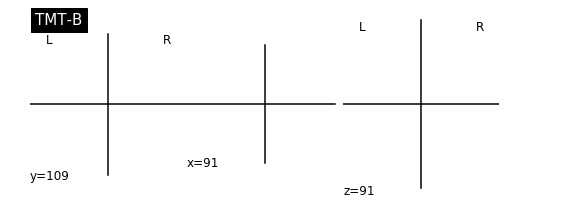

In [6]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss_oa/stats/tbss_oa_dsn_tmtbz_tfce_corrp_tstat1.nii.gz', threshold = 0.90, title = 'TMT-B')

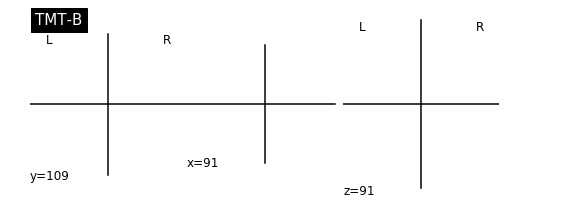

In [8]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss_oa/stats/tbss_oa_dsn_tmtbz_tfce_corrp_tstat2.nii.gz', threshold = 0.90, title = 'TMT-B')

In [18]:
%%bash
cd /Volumes/G-DRIVE\ mobile/derivatives/tbss_ya/stats
ls *.con

printf "1\n-1" > 1var.txt
Text2Vest 1var.txt 1var.con

randomise -i all_FA_skeletonised -o tbss_ya_dsn_tmtbz -d dsn_tmtbz.mat \
-t 1var.con -n 500 --T2 -D

3var.con
4var.con
randomise options: -i all_FA_skeletonised -o tbss_ya_dsn_tmtbz -d dsn_tmtbz.mat -t 1var.con -n 500 --T2 -D 
Loading Data: 
Data loaded
7.96097e+53 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutation 3

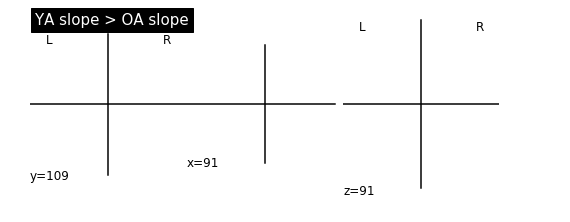

In [7]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss_ya/stats/tbss_ya_dsn_tmtbz_tfce_corrp_tstat1.nii.gz', threshold = 0.90, title = 'YA slope > OA slope')


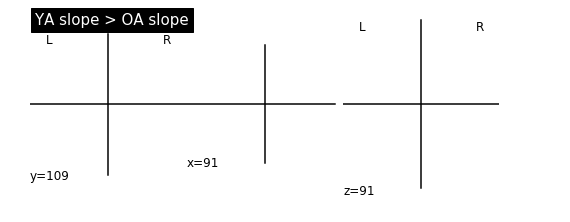

In [9]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss_ya/stats/tbss_ya_dsn_tmtbz_tfce_corrp_tstat2.nii.gz', threshold = 0.90, title = 'YA slope > OA slope')
